# Classification

# KNN algorithm

In [27]:
import pandas as pd
df=pd.read_csv('tshirt.csv')
df

,Height,Width,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  18 non-null     int64 
 1   Width   18 non-null     int64 
 2   Size    18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [29]:
df=pd.get_dummies(df,drop_first=True)
df

,Height,Width,Size_M
0,158,58,1
1,158,59,1
2,158,63,1
3,160,59,1
4,160,60,1
5,163,60,1
6,163,61,1
7,160,64,0
8,163,64,0
9,165,61,0


In [30]:
y=df['Size_M']
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: Size_M, dtype: uint8

In [31]:
x=df.drop('Size_M',axis=1)
x

,Height,Width
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
nn=KNeighborsClassifier(n_neighbors=3)
model=nn.fit(x,y)
y_pred=model.predict(x)
print(y_pred)

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [65]:
y_pred=model.predict([[161,61]])
print(y_pred)

[1]


In [66]:
y_pred=model.predict(x)
print(y_pred)
dif=pd.DataFrame({'Actual':y,'Predicated':y_pred})
dif

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


,Actual,Predicated
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


In [67]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y,y_pred)
print("acs :" , acs)

acs : 1.0


In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[11,  0],
       [ 0,  7]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
print("error :" ,1-acs)

error : 0.0


In [70]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

In [71]:
print("sensitivity :" ,TP / (TP+FN))

sensitivity : 1.0


In [72]:
print("specificity :" ,TN / (TN+FP))

specificity : 1.0


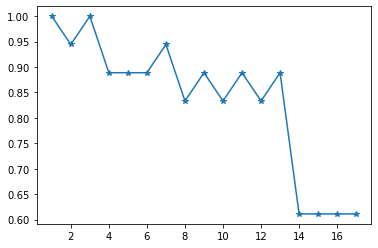

In [75]:
import matplotlib.pyplot as plt
k=[]
for i in range(1,18):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x,y)
    y_pred=model.predict(x)
#     print(y_pred)
    acc=accuracy_score(y,y_pred)
    k.append(acc)
plt.plot(range(1,18),k,marker='*')    
plt.show()
    
    

# KNN Model-1

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [4]:
x=df.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [102]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=15)
model=nn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 0 0]


In [103]:
dif=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dif

,Actual,Predicted
285,0,1
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,0,0


In [104]:
dif.to_csv("output.csv")

In [105]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[89, 10],
       [23, 32]], dtype=int64)

In [106]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

In [107]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y_test,y_pred)
print("acs :" , acs)

acs : 0.7857142857142857


In [108]:
print("error :" ,1-acs)

error : 0.2142857142857143


In [109]:
print("sensitivity :" ,TP / (TP+FN))

sensitivity : 0.5818181818181818


In [110]:
print("specificity :" ,TN / (TN+FP))

specificity : 0.898989898989899


1 : 0.7207792207792207
2 : 0.7272727272727273
3 : 0.7402597402597403
4 : 0.7207792207792207
5 : 0.7337662337662337
6 : 0.7727272727272727
7 : 0.7597402597402597
8 : 0.7662337662337663
9 : 0.7662337662337663
10 : 0.7597402597402597
11 : 0.7467532467532467
12 : 0.7727272727272727
13 : 0.7662337662337663
14 : 0.7727272727272727
15 : 0.7857142857142857
16 : 0.7857142857142857
17 : 0.7857142857142857
18 : 0.7727272727272727
19 : 0.7727272727272727
20 : 0.7727272727272727
21 : 0.7662337662337663
22 : 0.7727272727272727
23 : 0.7662337662337663
24 : 0.7792207792207793
25 : 0.7532467532467533
26 : 0.7727272727272727
27 : 0.7532467532467533
28 : 0.7662337662337663
29 : 0.7662337662337663
30 : 0.7792207792207793
31 : 0.7727272727272727
32 : 0.7727272727272727
33 : 0.7597402597402597
34 : 0.7727272727272727
35 : 0.7597402597402597
36 : 0.7792207792207793
37 : 0.7597402597402597
38 : 0.7792207792207793
39 : 0.7532467532467533
40 : 0.7727272727272727
41 : 0.7597402597402597
42 : 0.7662337662337663
4

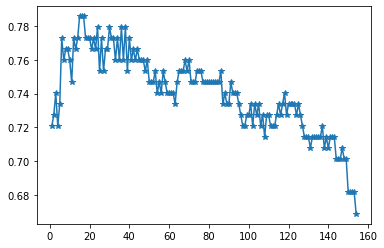

In [111]:
import matplotlib.pyplot as plt
k=[]
for i in range(1,155):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
#     print(y_pred)
    acc=accuracy_score(y_test,y_pred)
    k.append(acc)
    print(i,':',acc)
plt.plot(range(1,155),k,marker='*')    
plt.show()



# KNN Model-2

In [120]:
import pandas as pd
df=pd.read_csv('AptitudeCommunication.csv')
df

,Name,Aptitude,Communication,Class
0,Karuna,2,5.0,Speaker
1,Bhavan,2,6.0,Speaker
2,Gaurav,7,6.0,Leader
3,Parul,7,5.0,Leader
4,Dinesh,8,6.0,Leader
5,Jani,4,7.0,Speaker
6,Bobby,6,6.0,Leader
7,Parimal,3,5.5,Speaker
8,Govind,8,6.0,Leader
9,Shushant,6,4.0,Leader


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           14 non-null     object 
 1   Aptitude       14 non-null     int64  
 2   Communication  14 non-null     float64
 3   Class          14 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 576.0+ bytes


In [122]:
df.drop(["Name"],axis=1,inplace=True)
df

,Aptitude,Communication,Class
0,2,5.0,Speaker
1,2,6.0,Speaker
2,7,6.0,Leader
3,7,5.0,Leader
4,8,6.0,Leader
5,4,7.0,Speaker
6,6,6.0,Leader
7,3,5.5,Speaker
8,8,6.0,Leader
9,6,4.0,Leader


In [125]:
df1=pd.get_dummies(df,drop_first=True)
df1

,Aptitude,Communication,Class_Speaker
0,2,5.0,1
1,2,6.0,1
2,7,6.0,0
3,7,5.0,0
4,8,6.0,0
5,4,7.0,1
6,6,6.0,0
7,3,5.5,1
8,8,6.0,0
9,6,4.0,0


In [126]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [127]:
y=df1['Class_Speaker']
y

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    1
11    0
12    1
13    0
Name: Class_Speaker, dtype: uint8

In [128]:
x=df1.drop("Class_Speaker",axis=1)
x

,Aptitude,Communication
0,2,5.0
1,2,6.0
2,7,6.0
3,7,5.0
4,8,6.0
5,4,7.0
6,6,6.0
7,3,5.5
8,8,6.0
9,6,4.0


In [143]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=3)
model=nn.fit(x,y)
y_pred=model.predict(x)
print(y_pred)

[1 1 0 0 0 1 1 1 0 0 1 0 1 0]


In [144]:
dif=pd.DataFrame({'Actual':y,'Predicted':y_pred})
dif

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,1
7,1,1
8,0,0
9,0,0


In [145]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[7, 1],
       [0, 6]], dtype=int64)

In [146]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

In [147]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y,y_pred)
print("acs :" ,acs)

acs : 0.9285714285714286


In [148]:
print("error :" ,1-acs)

error : 0.0714285714285714


In [149]:
print("sensitivity :" ,TP / (TP+FN))

sensitivity : 1.0


In [150]:
print("specificity :" ,TN / (TN+FP))

specificity : 0.875


1 : 0.9285714285714286
2 : 0.8571428571428571
3 : 0.9285714285714286
4 : 0.8571428571428571
5 : 0.8571428571428571
6 : 0.8571428571428571
7 : 0.8571428571428571
8 : 0.8571428571428571
9 : 0.8571428571428571
10 : 0.8571428571428571
11 : 0.8571428571428571
12 : 0.5714285714285714
13 : 0.5714285714285714


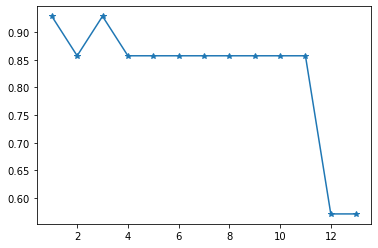

In [151]:
import matplotlib.pyplot as plt
k=[]
for i in range(1,14):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x,y)
    y_pred=model.predict(x)
#     print(y_pred)
    acc=accuracy_score(y,y_pred)
    k.append(acc)
    print(i,':',acc)
plt.plot(range(1,14),k,marker='*')    
plt.show()



# Decision Tree

# Tree-1

In [3]:
import pandas as pd
df=pd.read_csv('DecisionTree_Sports.csv')
df

,Day,Weather,Temp,Humidity,Wind,Play_Sports
0,Day1,Sunny,Hot,High,Weak,No
1,Day2,Sunny,Hot,High,Strong,No
2,Day3,Cloudy,Hot,High,Weak,Yes
3,Day4,Rainy,Mild,High,Weak,Yes
4,Day5,Rainy,Cool,Normal,Weak,Yes
5,Day6,Rainy,Cool,Normal,Strong,No
6,Day7,Cloudy,Cool,Normal,Strong,Yes
7,Day8,Sunny,Mild,High,Weak,No
8,Day9,Sunny,Cool,Normal,Weak,Yes
9,Day10,Rainy,Mild,Normal,Weak,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     object
 1   Weather      14 non-null     object
 2   Temp         14 non-null     object
 3   Humidity     14 non-null     object
 4   Wind         14 non-null     object
 5   Play_Sports  14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [5]:
df.drop("Day",axis=1,inplace=True)
df

,Weather,Temp,Humidity,Wind,Play_Sports
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Cloudy,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Cloudy,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [6]:
df1=pd.get_dummies(df,drop_first=True)
df1

,Weather_Rainy,Weather_Sunny,Temp_Hot,Temp_Mild,Humidity_Normal,Wind_Weak,Play_Sports_Yes
0,0,1,1,0,0,1,0
1,0,1,1,0,0,0,0
2,0,0,1,0,0,1,1
3,1,0,0,1,0,1,1
4,1,0,0,0,1,1,1
5,1,0,0,0,1,0,0
6,0,0,0,0,1,0,1
7,0,1,0,1,0,1,0
8,0,1,0,0,1,1,1
9,1,0,0,1,1,1,1


In [7]:
y=df1['Play_Sports_Yes']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play_Sports_Yes, dtype: uint8

In [8]:
x=df1.drop("Play_Sports_Yes",axis=1)
x

,Weather_Rainy,Weather_Sunny,Temp_Hot,Temp_Mild,Humidity_Normal,Wind_Weak
0,0,1,1,0,0,1
1,0,1,1,0,0,0
2,0,0,1,0,0,1
3,1,0,0,1,0,1
4,1,0,0,0,1,1
5,1,0,0,0,1,0
6,0,0,0,0,1,0
7,0,1,0,1,0,1
8,0,1,0,0,1,1
9,1,0,0,1,1,1


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=None)
model=dt.fit(x,y)
y_pred=model.predict(x)
print(y_pred)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [10]:
pd.DataFrame({'Actual':y,'Predicted':y_pred})

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[5, 0],
       [0, 9]], dtype=int64)

In [12]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

In [13]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y,y_pred)
print("acs :" ,acs )

acs : 1.0


In [14]:
print("error :" ,1-acs)

error : 0.0


In [15]:
print("sensitivity :" ,TP / (TP+FN))

sensitivity : 1.0


In [16]:
print("specificity :" ,TN / (TN+FP))

specificity : 1.0


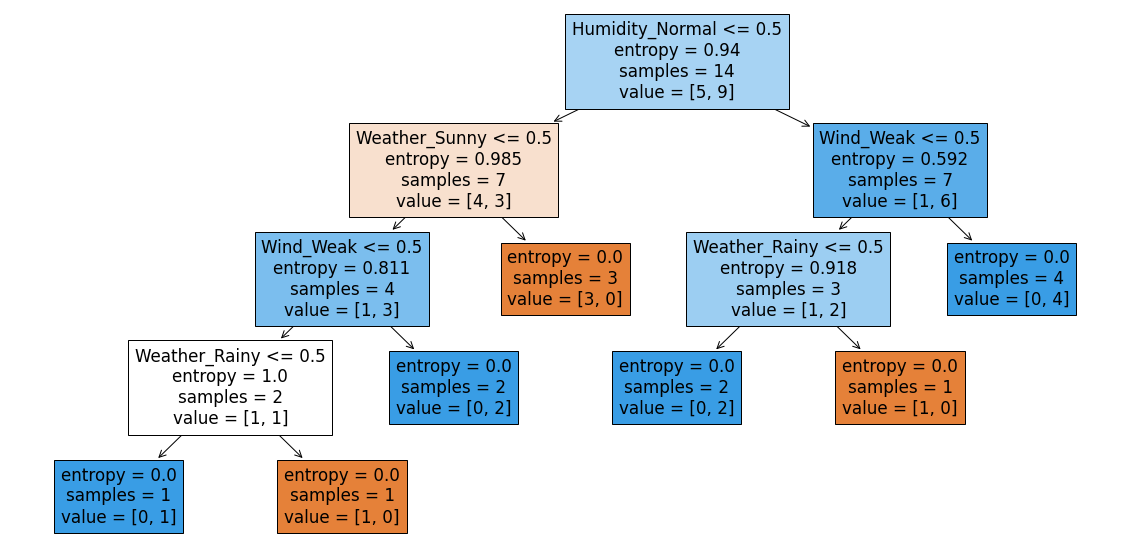

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True,feature_names=x.columns)
plt.show()

# Tree-2

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
x=df.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)
(614,)
(154, 8)


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=None)
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 1 0 1 0 1]


In [13]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
285,0,1
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,1
318,0,0
154,1,1
684,0,0


In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[75, 24],
       [22, 33]], dtype=int64)

In [15]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

In [16]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y_test,y_pred)
print("acs :" ,acs )

acs : 0.7012987012987013


In [17]:
print("error :" ,1-acs)

error : 0.2987012987012987


In [18]:
print("sensitivity :" ,TP / (TP+FN))

sensitivity : 0.6


In [19]:
print("specificity :" ,TN / (TN+FP))

specificity : 0.7575757575757576


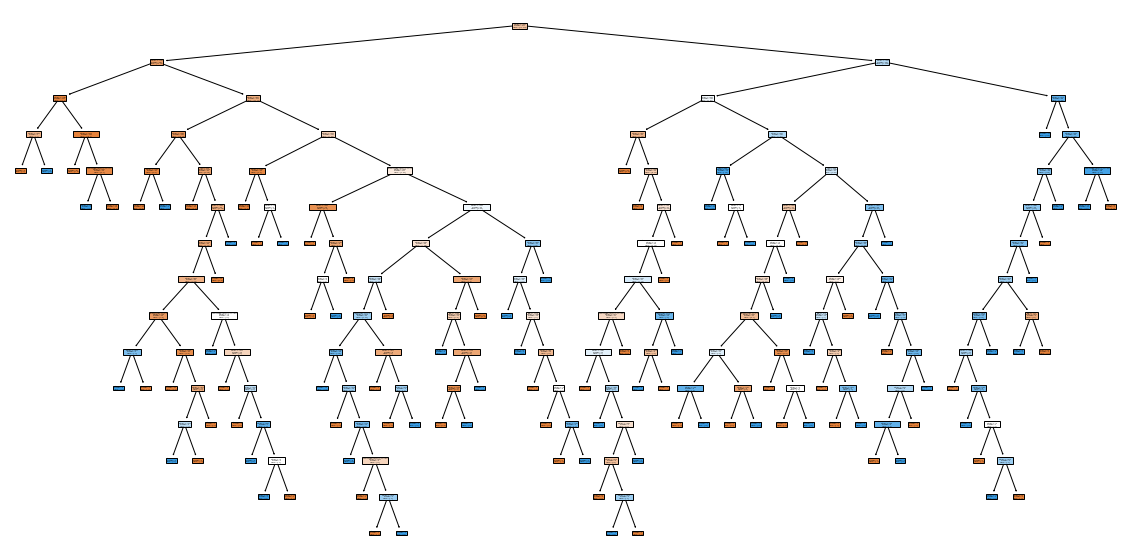

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True,feature_names=x.columns)
plt.show()